In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
train_dir = "../data/animal/train"  # Path ไปยังโฟลเดอร์ training data
validation_dir = "../data/animal/val"  # Path ไปยังโฟลเดอร์ validation data
img_size = (146, 146)  # ขนาดรูปภาพ (width, height)
batch_size = 32  # ขนาด Batch Size
learning_rate = 0.0001  # Learning Rate
epochs = 100  # จำนวน Epochs

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,             # ปรับค่า pixels ให้อยู่ในช่วง [0, 1]
    rotation_range=40,          # สุ่มหมุนภาพ (-40 ถึง +40 องศา)
    width_shift_range=0.2,      # สุ่มเลื่อนภาพในแนวนอน (สัดส่วน 0.2 ของความกว้าง)
    height_shift_range=0.2,     # สุ่มเลื่อนภาพในแนวตั้ง (สัดส่วน 0.2 ของความสูง)
    shear_range=0.2,            # สุ่มทำ Shear Transformation
    zoom_range=0.2,             # สุ่มซูมภาพ
    horizontal_flip=True,       # สุ่มพลิกภาพในแนวนอน
    fill_mode='nearest'         # เติม pixels ที่ว่างด้วย pixel ที่ใกล้ที่สุด
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Validation data ไม่ทำ Augmentation

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # สำหรับ Binary Classification (2 คลาส)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 9892 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(146, 146, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),  # เพิ่ม Dropout Layer (สุ่มปิด 50% ของ neurons)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # เพิ่ม Dropout Layer อีกชั้น
    layers.Dense(1, activation='sigmoid')  # Output Layer (Sigmoid สำหรับ Binary Classification)
])


d:\Code\IS\env_py\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # เฝ้าดู Validation Loss
    patience=10,          # รอ 10 epochs ถ้า Validation Loss ไม่ดีขึ้น
    restore_best_weights=True  # คืนค่า Weights เป็นค่าที่ดีที่สุด
)

In [9]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # ใส่ Early Stopping Callback
)

d:\Code\IS\env_py\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 141s 452ms/step - accuracy: 0.6039 - loss: 0.6465 - val_accuracy: 0.7940 - val_loss: 0.4520
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 73s 236ms/step - accuracy: 0.8049 - loss: 0.4320 - val_accuracy: 0.8040 - val_loss: 0.4465
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 0.8438 - loss: 0.3581 - val_accuracy: 0.9050 - val_loss: 0.2539
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 81s 262ms/step - accuracy: 0.8723 - loss: 0.3019 - val_accuracy: 0.8830 - val_loss: 0.2930
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 81s 261ms/step - accuracy: 0.8843 - loss: 0.2824 - val_accuracy: 0.9240 - val_loss: 0.2114
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 81s 263ms/step - accuracy: 0.8898 - loss: 0.2719 - val_accuracy: 0.9540 - val_loss: 0.1462
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.8883 - loss: 0.2698 - val_accuracy: 0.9540 - val_loss: 0.1475
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 76s 245ms/step - accuracy: 0.9087 

In [10]:
model.save("cnn_model.keras")

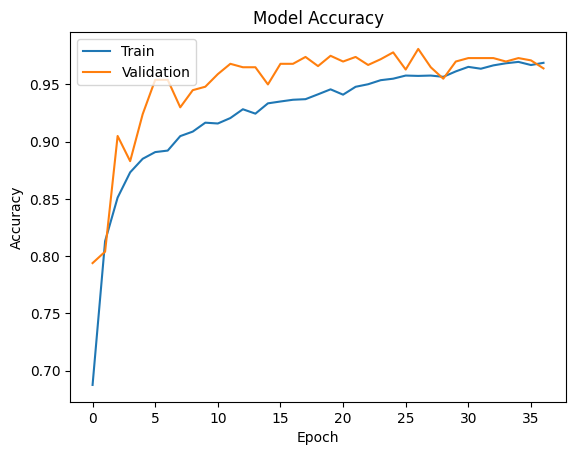

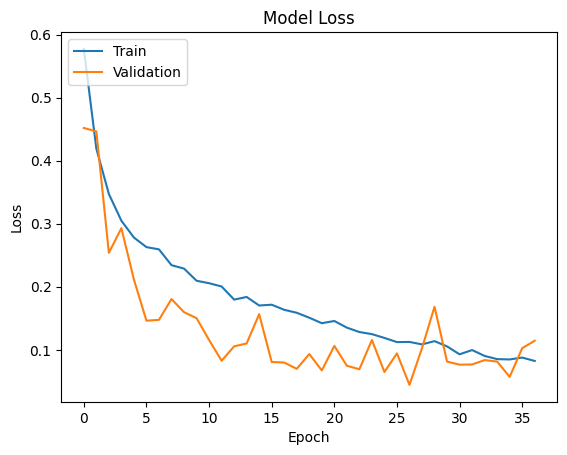

CNN Model Training and Saving Complete.


In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("CNN Model Training and Saving Complete.")